In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm


In [2]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def loss(x):
    return himmelblau(x[0], x[1])

# Base ES

In [3]:
# hyperparameters
episodes = 20
gens = 20

# scale [0,1] to [0,4], then shift it left so that it's [-2,2]
# x corresponds to an array of network parameters
x = np.random.rand(2) * 4 - 2


plot_xs = np.array([x])

# initial parent x
x_p = x
best_loss = loss(x_p)
for e in range(episodes-1):
    n = np.random.normal(scale=0.5, size=(gens, 2))
    for i in range(gens-1):
        x = x_p + n[i, :]
        x_loss = loss(x)
        if x_loss < best_loss:
            best_loss = x_loss
            curr_best_x = x

    # numpy is weird and this is the way I found to append an array at the end of some other array
    plot_xs = np.stack((*plot_xs, x_p))

    x_p = curr_best_x

[[-1.409323    1.66664405]
 [-1.409323    1.66664405]
 [-1.4453304   2.40545394]
 [-2.09457467  2.95026017]
 [-2.65001077  3.23088752]
 [-2.8805578   3.25945137]
 [-2.8805578   3.25945137]
 [-2.88342516  3.12755087]
 [-2.88342516  3.12755087]
 [-2.88342516  3.12755087]
 [-2.88342516  3.12755087]
 [-2.88342516  3.12755087]
 [-2.88342516  3.12755087]
 [-2.88342516  3.12755087]
 [-2.88342516  3.12755087]
 [-2.81364823  3.17200915]
 [-2.81364823  3.17200915]
 [-2.81364823  3.17200915]
 [-2.81364823  3.17200915]
 [-2.81364823  3.17200915]]


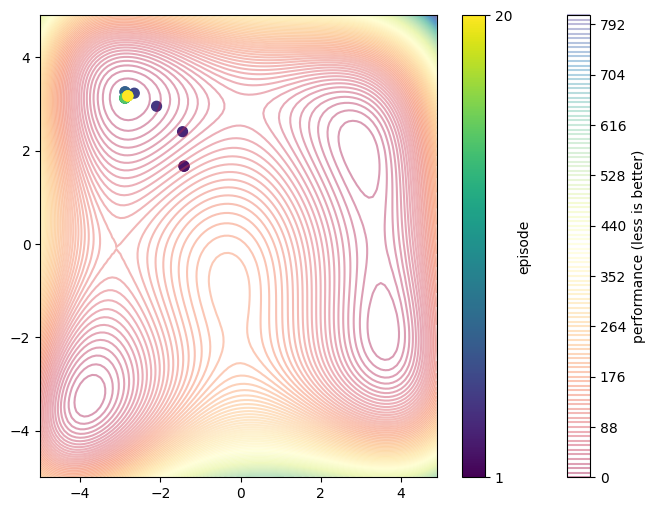

In [4]:

fig = plt.figure(figsize=(8, 6))
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)
cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                 norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
cba = fig.colorbar(cs)
cba.set_label('performance (less is better)')

plot_z = np.linspace(0, 1, plot_xs.shape[0])
xs = plt.scatter(plot_xs[:, 0], plot_xs[:, 1], s=50, c=plot_z, cmap=cm.viridis)
cbb = fig.colorbar(xs)
cbb.set_label('episode')
cbb.set_ticks([0, 1])
cbb.set_ticklabels([1, len(plot_xs)])
plt.show()

# Grad ES

In [15]:
# hyperparameters
episodes = 20
gens = 20

# scale [0,1] to [0,4], then shift it left so that it's [-2,2]
# x corresponds to an array of network parameters
x = np.random.rand(2) * 4 - 2


plot_xs = np.array([x])

# initial parent x
x_p = x
best_loss = loss(x_p)
current_xs = [0] * gens
for e in range(episodes-1):
    N = np.random.normal(scale=0.5, size=(gens, 2))
    offspring_losses = np.zeros((gens, len(x)))
    for i in range(gens-1):
        x = x_p + N[i, :]
        x_loss = loss(x)
        # now that we're using this gradient technique, we won't actually use the most fit x other than
        # for gauging performance
        if x_loss < best_loss:
            best_loss = x_loss
            curr_best_x = x
        current_xs[i] = x
        offspring_losses[i] = x_loss

    # mean of offspring Xs' performance
    mu_loss = np.mean(offspring_losses)
    std_loss = np.std(offspring_losses)
    # normalize losses
    A = mu_loss
    if std_loss != 0:
        A = (offspring_losses - mu_loss) / std_loss
    
    # weight losses by distance from parent,
    # grad = (A * N) / gens
    grad = np.mean(A * N, axis=-2)
    print('grad', grad)


    # x_p = curr_best_x
    # numpy is weird and this is the way I found to append an array at the end of some other array
    plot_xs = np.stack((*plot_xs, x_p))
    # grad points up so we want the inverse of it
    x_p = x - grad

grad [-0.3015579  -0.00390801]
grad [-0.36941606  0.16023094]
grad [0.33535149 0.04171452]
grad [ 0.39641893 -0.09538323]
grad [0.40491054 0.20211289]
grad [ 0.07999341 -0.28299731]
grad [ 0.34805644 -0.0667276 ]
grad [0.41673328 0.1935364 ]
grad [0.4192598  0.07519132]
grad [-0.05810229  0.04267705]
grad [-0.12541008  0.04484192]
grad [-0.25054547 -0.1227993 ]
grad [-0.34684556 -0.28021671]
grad [ 0.23856783 -0.28148917]
grad [ 0.06217185 -0.45510071]
grad [-0.07559269 -0.21627904]
grad [0.47750871 0.06234756]
grad [0.33889874 0.09945274]
grad [0.16869271 0.05164157]
[[ 1.15872408 -1.14065117]
 [ 1.15872408 -1.14065117]
 [ 2.54770621 -1.0048024 ]
 [ 3.8653257  -1.68411106]
 [ 4.61461967 -1.98796186]
 [ 4.60679085 -2.13036262]
 [ 3.93945665 -2.7141902 ]
 [ 3.93144806 -1.86880098]
 [ 4.49148259 -1.89478417]
 [ 4.15858102 -1.58674248]
 [ 3.22671958 -1.88692459]
 [ 3.36054008 -1.48926147]
 [ 3.37308021 -1.66117102]
 [ 2.82635036 -2.58297188]
 [ 3.89218373 -2.74633668]
 [ 3.87015279 -2.717

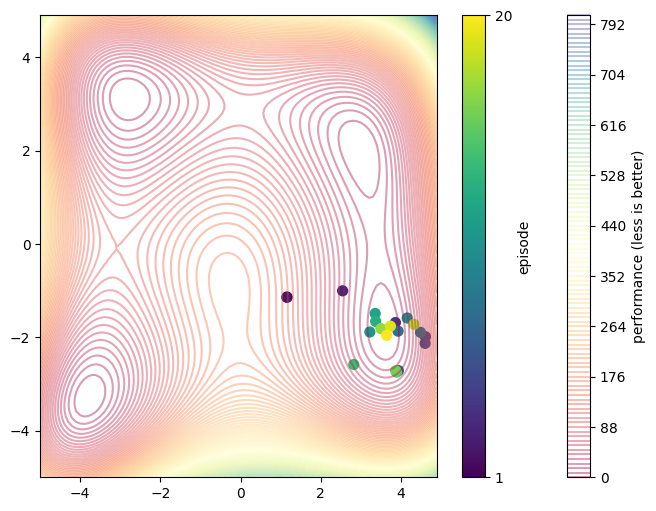

In [16]:

fig = plt.figure(figsize=(8, 6))
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)
cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                 norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
cba = fig.colorbar(cs)
cba.set_label('performance (less is better)')

plot_z = np.linspace(0, 1, plot_xs.shape[0])
xs = plt.scatter(plot_xs[:, 0], plot_xs[:, 1], s=50, c=plot_z, cmap=cm.viridis)
cbb = fig.colorbar(xs)
cbb.set_label('episode')
cbb.set_ticks([0, 1])
cbb.set_ticklabels([1, len(plot_xs)])
plt.show()